In [5]:
import matplotlib.pyplot as pyplot

In [6]:
pixels = pyplot.imread(r"data\Nicolas_Cage_unmasked1.jpg")

In [7]:
import mtcnnMTCNN

In [8]:
detector = mtcnn.MTCNN()

In [9]:
results = detector.detect_faces(pixels)

In [10]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [14]:
# extract the face
face = pixels[y1:y2, x1:x2]

In [16]:
from PIL import Image
import numpy as np

In [17]:
image = Image.fromarray(face)
image = image.resize((224, 224))
face_array = np.asarray(image)

In [18]:
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = mtcnn.MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [31]:
face_pixels = extract_face(r"data\rihanna.jpg")

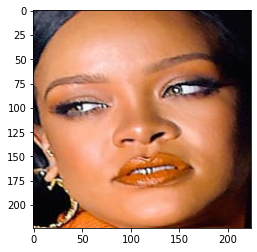

In [32]:
pyplot.imshow(face_pixels)

In [24]:
# The keras-vggface library provides three pre-trained VGGModels
# a VGGFace1 model via model=’vgg16′ (the default), and two VGGFace2 models ‘resnet50‘ and ‘senet50‘

In [30]:
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
 
# load the photo and extract the face
pixels = extract_face(r"data\rihanna.jpg")
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Da_Brat': 42.899%
b' Cris_Vianna': 26.442%
b' Demetria_McKinney': 3.188%
b' Ava_DuVernay': 1.322%
b' Carmen_Ejogo': 0.733%


In [1]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [extract_face(f) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    print(known_embedding,'\n', candidate_embedding)
    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

# define filenames
filenames = ['data\\Nicolas_Cage_unmasked1.jpg', 'data\\Nicolas_Cage_unmasked2.jpg', 'data\\rihanna.jpg', 'data\\Nicolas_Cage_masked1.jpg', 'data\\Nicolas_Cage_masked2.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define sharon stone
sharon_id = embeddings[0]
# verify known photos of sharon
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[3])
# verify known photos of other people
print('Negative Tests')
is_match(embeddings[0], embeddings[2])
is_match(embeddings[0], embeddings[4])


Positive Tests
[0.         0.11390073 0.5579251  ... 5.041936   0.         0.1838807 ] 
 [0.         0.26238444 0.43684983 ... 0.01502413 2.1768694  0.00596868]
>face is a Match (0.277 <= 0.500)
[0.         0.11390073 0.5579251  ... 5.041936   0.         0.1838807 ] 
 [0.         0.         0.         ... 0.         0.00027118 0.00709504]
>face is a Match (0.377 <= 0.500)
Negative Tests
[0.         0.11390073 0.5579251  ... 5.041936   0.         0.1838807 ] 
 [0.28829905 0.09566037 0.         ... 0.8600594  0.03671622 0.        ]
>face is NOT a Match (0.724 > 0.500)
[0.         0.11390073 0.5579251  ... 5.041936   0.         0.1838807 ] 
 [0.         0.         0.25399148 ... 0.         0.         0.01211723]
>face is NOT a Match (0.879 > 0.500)


In [6]:
len([x for x in embeddings[0] if x == 0])

554

In [9]:
len([x for x in embeddings[4] if x == 0])

1271